<a href="https://colab.research.google.com/github/urmiMahapatra/Flight_booking_Prediction/blob/main/Filght_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the  libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("Flight_Booking.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df= df.drop(columns=["Unnamed: 0"],axis=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
## checking the shape and information about dataset
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

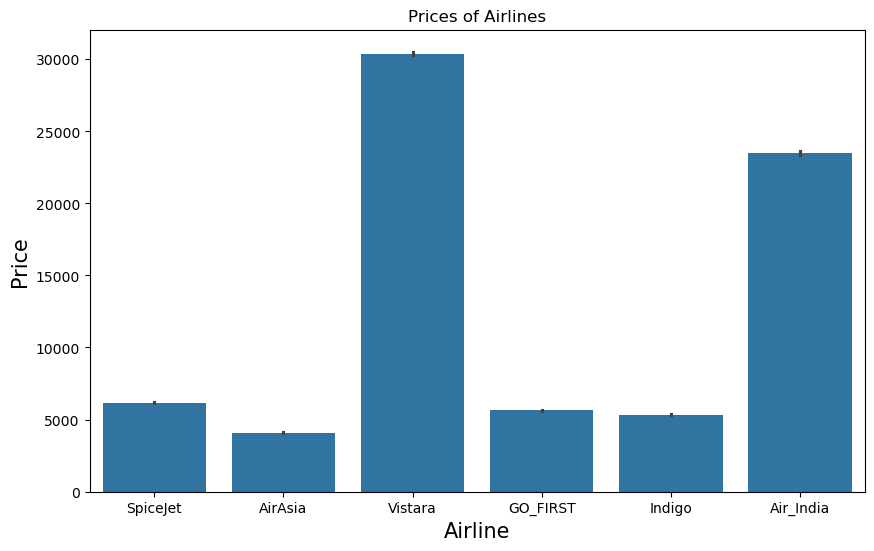

In [ ]:
# visualization of price difference in different airline

plt.figure(figsize=(10,6))
sns.barplot(x=df["airline"],y=df["price"])
plt.xlabel("Airline",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Prices of Airlines")
plt.show()

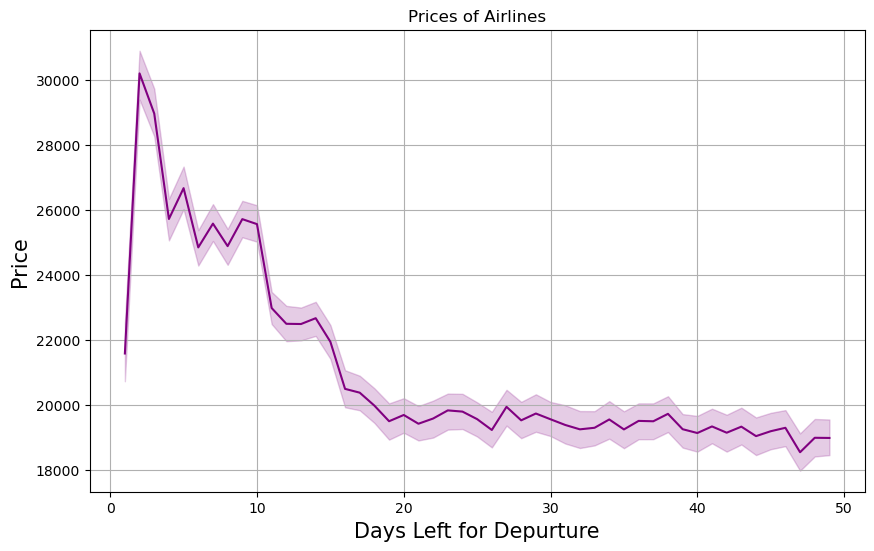

In [ ]:
# the price of ticket as per days_left
plt.figure(figsize=(10,6))
sns.lineplot(x=df["days_left"],y=df["price"],color="purple")
plt.xlabel("Days Left for Depurture",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Prices of Airlines")
plt.grid()
plt.show()


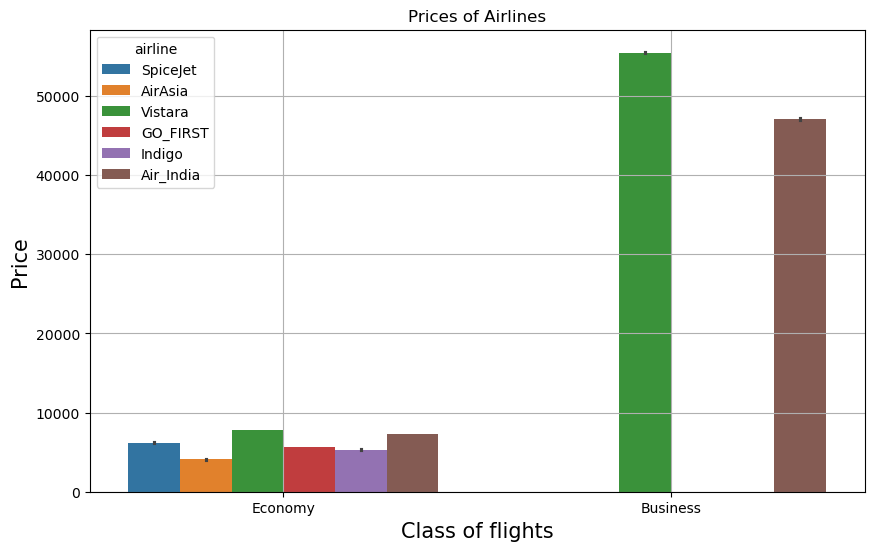

In [ ]:
## price of ticet as per class
plt.figure(figsize=(10,6))
sns.barplot(x=df["class"],y=df["price"],hue=df["airline"])
plt.xlabel("Class of flights",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Prices of Airlines")
plt.grid()
plt.show()

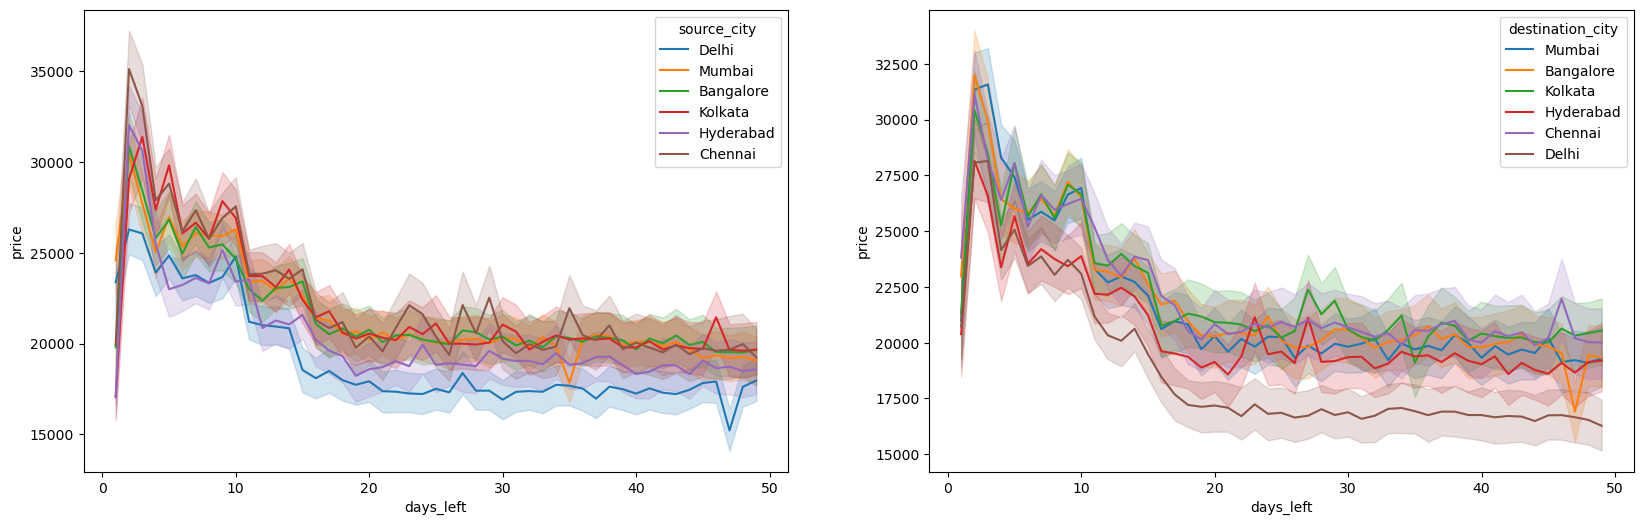

In [ ]:
## Range of price of flights with source and destination city according to days left
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x="days_left",y="price",data=df,hue="source_city",ax=ax[0])
sns.lineplot(x="days_left",y="price",data=df,hue="destination_city",ax=ax[1])
plt.show()

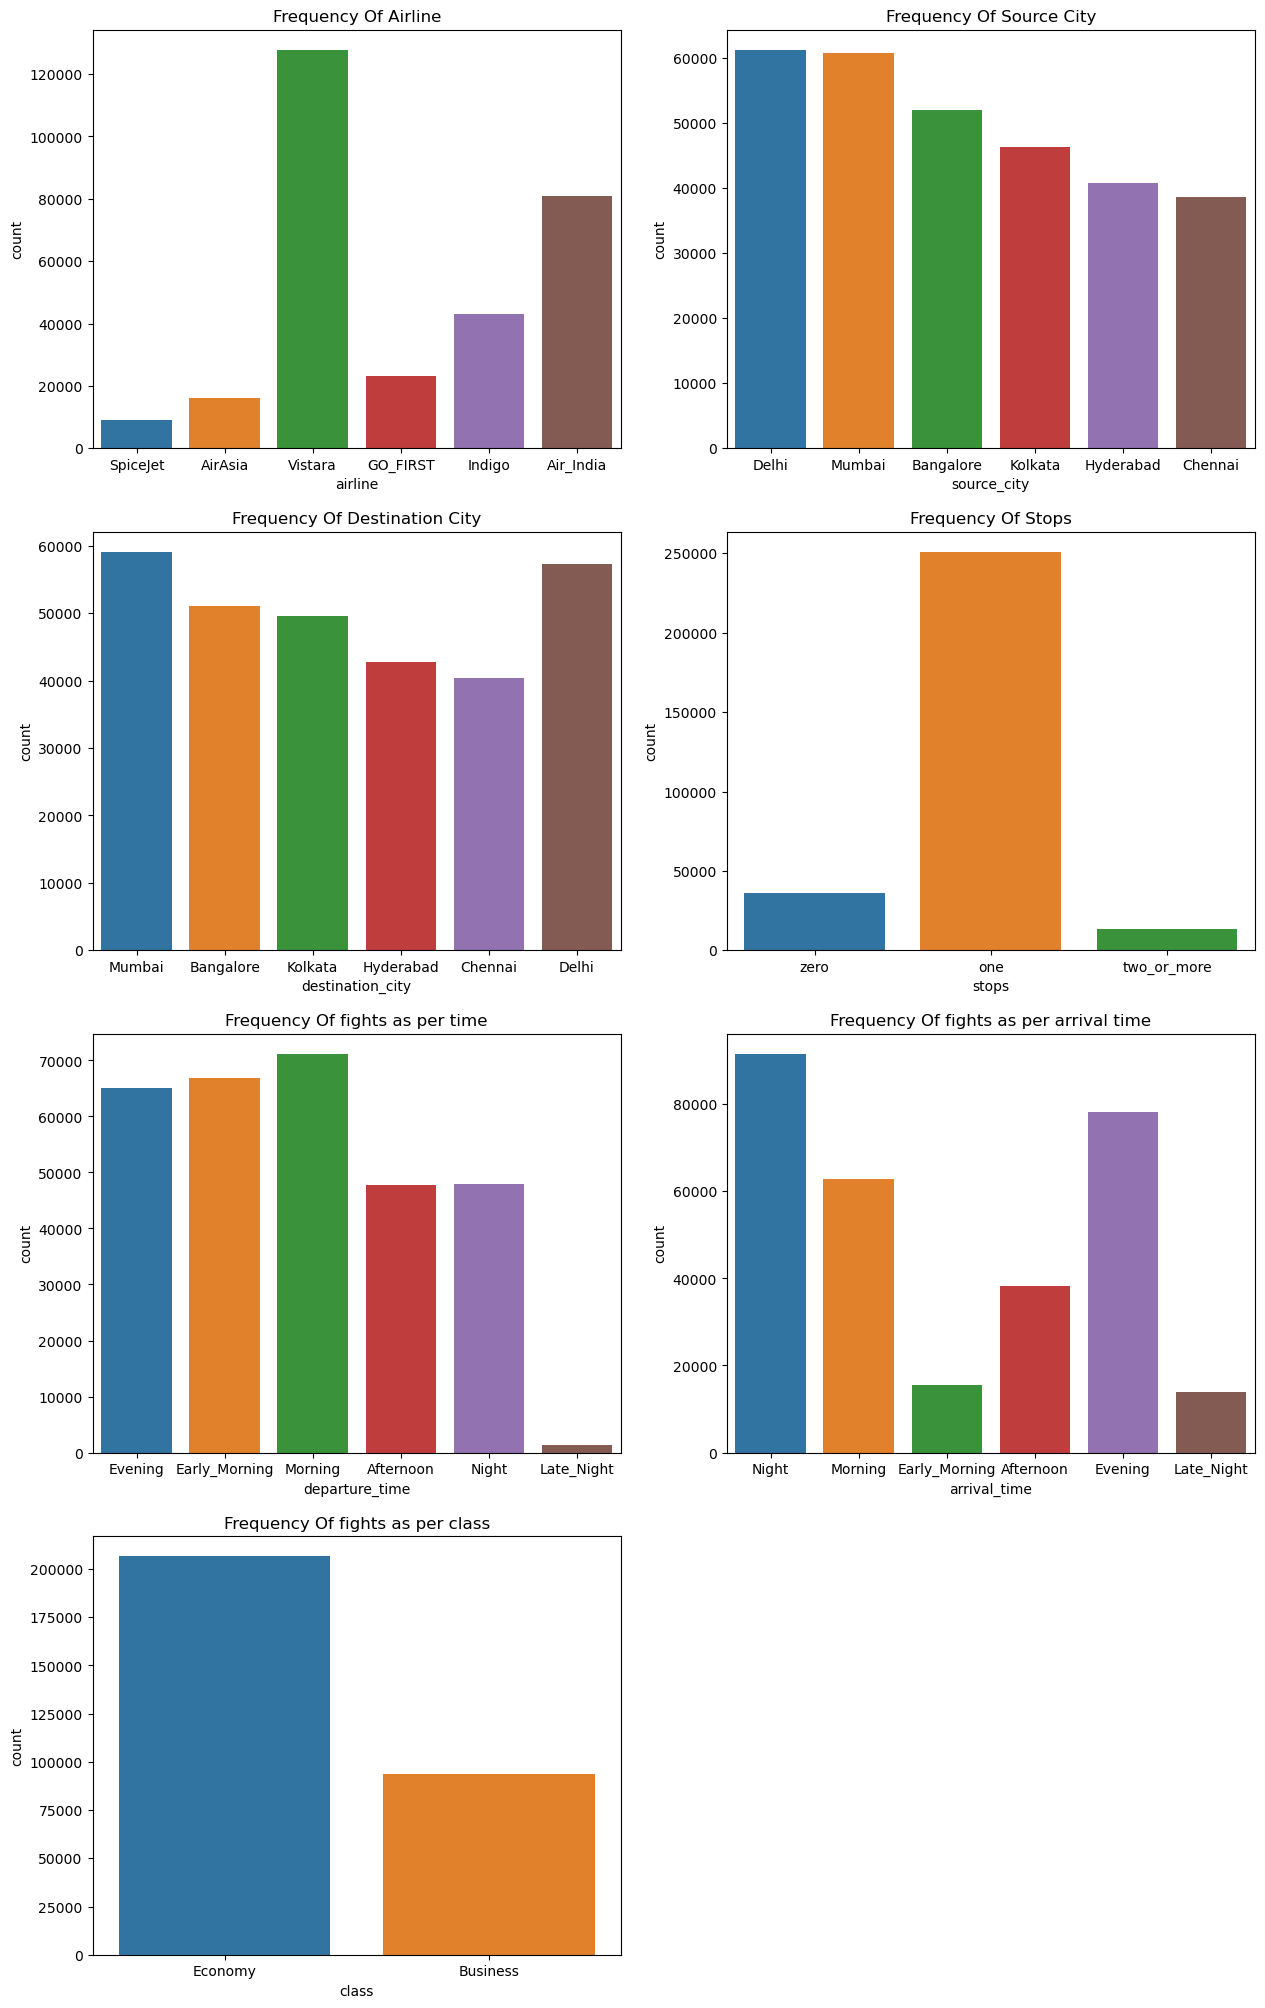

In [ ]:
# visualization of categorical feature with countplot

plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
sns.countplot(x=df["airline"],data=df,hue="airline")
plt.title("Frequency Of Airline")

plt.subplot(4,2,2)
sns.countplot(x=df["source_city"],data=df,hue="source_city")
plt.title("Frequency Of Source City")

plt.subplot(4,2,3)
sns.countplot(x=df["destination_city"],data=df,hue="destination_city")
plt.title("Frequency Of Destination City")

plt.subplot(4,2,4)
sns.countplot(x=df["stops"],data=df,hue="stops")
plt.title("Frequency Of Stops")


plt.subplot(4,2,5)
sns.countplot(x=df["departure_time"],data=df,hue="departure_time")
plt.title("Frequency Of fights as per time")

plt.subplot(4,2,6)
sns.countplot(x=df["arrival_time"],data=df,hue="arrival_time")
plt.title("Frequency Of fights as per arrival time")

plt.subplot(4,2,7)
sns.countplot(x=df["class"],data=df,hue="class")
plt.title("Frequency Of fights as per class")

plt.show()



In [ ]:
## label encoder perfom for one hot encoding

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:


column_encoded=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"]
for col in column_encoded:
    df[col]=  le.fit_transform(df[col])
    print(le.classes_)


['AirAsia' 'Air_India' 'GO_FIRST' 'Indigo' 'SpiceJet' 'Vistara']
['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
['one' 'two_or_more' 'zero']
['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
['Business' 'Economy']


In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


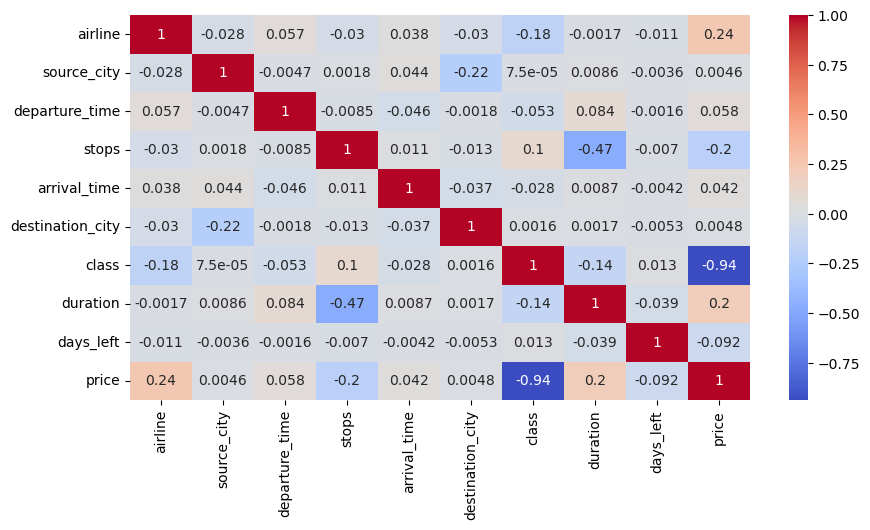

In [ ]:
## feature selection
new_df=df.drop(columns=["flight"])
# plotting corelation graph

plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(),annot= True,cmap="coolwarm")
plt.show()


In [ ]:
# using VIF for multicolonarity and for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[]
for i in df.columns:
    if((df[i].dtypes != "object") & ( i != "price")):
        col_list.append(i)


x= df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["value"] = [variance_inflation_factor(x.values , i)
                    for i in range(len(x.columns))]

print(vif_data)

            feature     value
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [ ]:
# as no vif value is more ythan 5 so all the columns will be there


## Applying standardization and implementing Linear Regression Model to
predict the price of a flight.

In [ ]:
X= new_df.drop(columns=["price"])
y= new_df["price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lg= LinearRegression()
lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)



In [ ]:
# find the diiference from actual and predicted value
diff= pd.DataFrame(np.c_[y_test,y_pred_lg,y_test-y_pred_lg],columns=["Actual Value","Predicted Value","Difference"])  # np.c is column stack
diff

,Actual Value,Predicted Value,Difference
0,7366.0,4568.729081,2797.270919
1,64831.0,52842.398340,11988.601660
2,6195.0,7873.091800,-1678.091800
3,60160.0,56136.099572,4023.900428
4,6578.0,6647.262793,-69.262793
...,...,...,...
90041,6134.0,6831.677986,-697.677986
90042,67004.0,54265.226285,12738.773715
90043,2410.0,-1909.485161,4319.485161
90044,2835.0,6022.319811,-3187.319811


In [ ]:
# calculating R2 score,mae,mape,mse,rmse
from sklearn.metrics import *
from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred_lg)
mean_absolute_percentage_error= metrics.mean_absolute_percentage_error(y_test,y_pred_lg)
mean_sq_error= metrics.mean_squared_error(y_test,y_pred_lg)
root_mean_sq_error=np.sqrt( metrics.mean_squared_error(y_test,y_pred_lg))
print(y_test)
print(y_pred_lg)
r2_score=r2_score(y_test,y_pred_lg)
print(mean_abs_error,mean_absolute_percentage_error,mean_sq_error,root_mean_sq_error)
print(r2_score)


27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
123895     6134
251253    67004
8335       2410
68668      2835
108970     3393
Name: price, Length: 90046, dtype: int64
[ 4568.72908138 52842.39833975  7873.09179994 ... -1909.48516083
  6022.31981087 -3485.93786442]
4625.782200648982 0.4373745115810859 49070691.439372644 7005.047568673081
0.9046553617250259


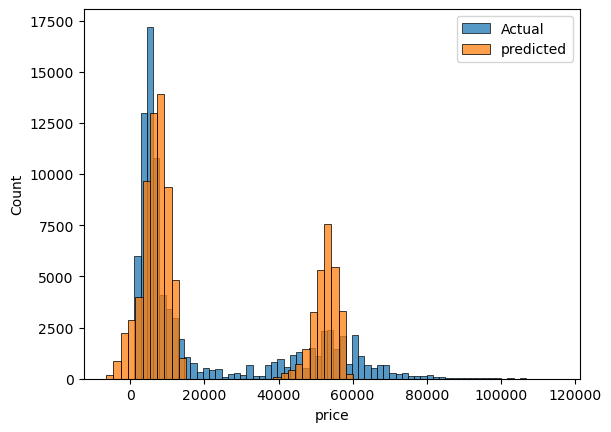

In [ ]:
# display the error
sns.histplot(y_test,label="Actual")
sns.histplot(y_pred_lg,label="predicted")
plt.legend()

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_predit_dt=dt.predict(x_test)


In [ ]:
mean_abs_error= metrics.mean_absolute_error(y_test,y_predit_dt)
mean_absolute_percentage_error= metrics.mean_absolute_percentage_error(y_test,y_predit_dt)
mean_sq_error= metrics.mean_squared_error(y_test,y_predit_dt)
root_mean_sq_error=np.sqrt( metrics.mean_squared_error(y_test,y_predit_dt))
print(mean_abs_error,mean_absolute_percentage_error,mean_sq_error,root_mean_sq_error)


1221.0256294930741 0.07778491473581156 12974369.094291005 3601.995154673449


In [ ]:
from sklearn.metrics import *
r2_score=r2_score(y_test,y_predit_dt)

print(r2_score)

0.9747907255460309


C:\Users\urmim\AppData\Local\Temp\ipykernel_42432\3678044974.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\urmim\AppData\Local\Temp\ipykernel_42432\3678044974.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predit_dt,label="predicted")


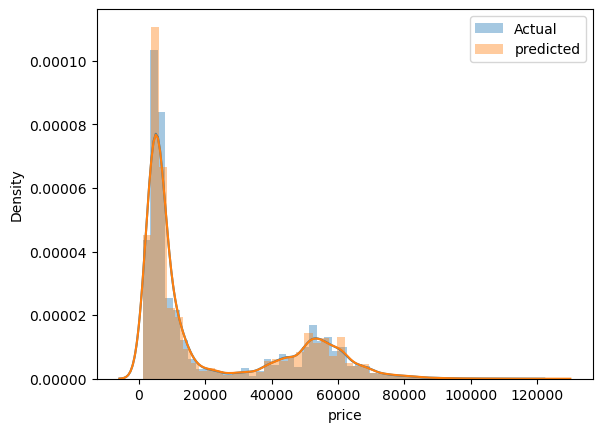

In [ ]:
# display the error
sns.distplot(y_test,label="Actual")
sns.distplot(y_predit_dt,label="predicted")
plt.legend()

# Random Forest Regressor

1135.922644502422 0.07404387101742126 8142118.9378331145 2853.439843037367


C:\Users\urmim\AppData\Local\Temp\ipykernel_42432\2159265067.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\urmim\AppData\Local\Temp\ipykernel_42432\2159265067.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predit_rf,label="predicted")


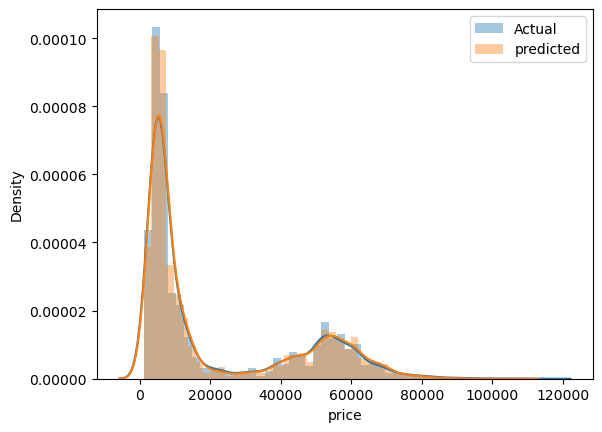

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf.fit(x_train,y_train)
y_predit_rf=rf.predict(x_test)


mean_abs_error= metrics.mean_absolute_error(y_test,y_predit_rf)
mean_absolute_percentage_error= metrics.mean_absolute_percentage_error(y_test,y_predit_rf)
mean_sq_error= metrics.mean_squared_error(y_test,y_predit_rf)
root_mean_sq_error=np.sqrt( metrics.mean_squared_error(y_test,y_predit_rf))
print(mean_abs_error,mean_absolute_percentage_error,mean_sq_error,root_mean_sq_error)

sns.distplot(y_test,label="Actual")
sns.distplot(y_predit_rf,label="predicted")
plt.legend()

C:\Users\urmim\AppData\Local\Temp\ipykernel_42432\1452323962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\urmim\AppData\Local\Temp\ipykernel_42432\1452323962.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predit_rf,label="predicted")


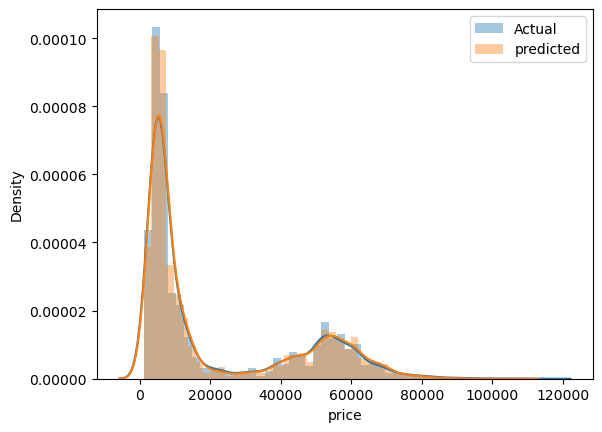

In [ ]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_predit_rf,label="predicted")
plt.legend()

In [ ]:
from sklearn.metrics import *

r2score=r2_score(y_test,y_predit_rf)

print(r2score)

0.9841798156466034
